# Импорт

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib.gridspec as gridspec


# Загрузка Датасета

In [20]:
data = pd.read_csv('../../DATA/Split/Средства, поступившие от реализации туристкого продукта.csv').drop('Unnamed: 0', axis=1)


In [21]:
data.columns.to_numpy().shape

(15,)

# Графики "Коробка с усами"

In [22]:
data = data.apply(lambda s: s.map(lambda a: float(a.replace(',', '.')) if type(a) is str else a))
names = data.columns.to_numpy()[1:]


## Без нормирования

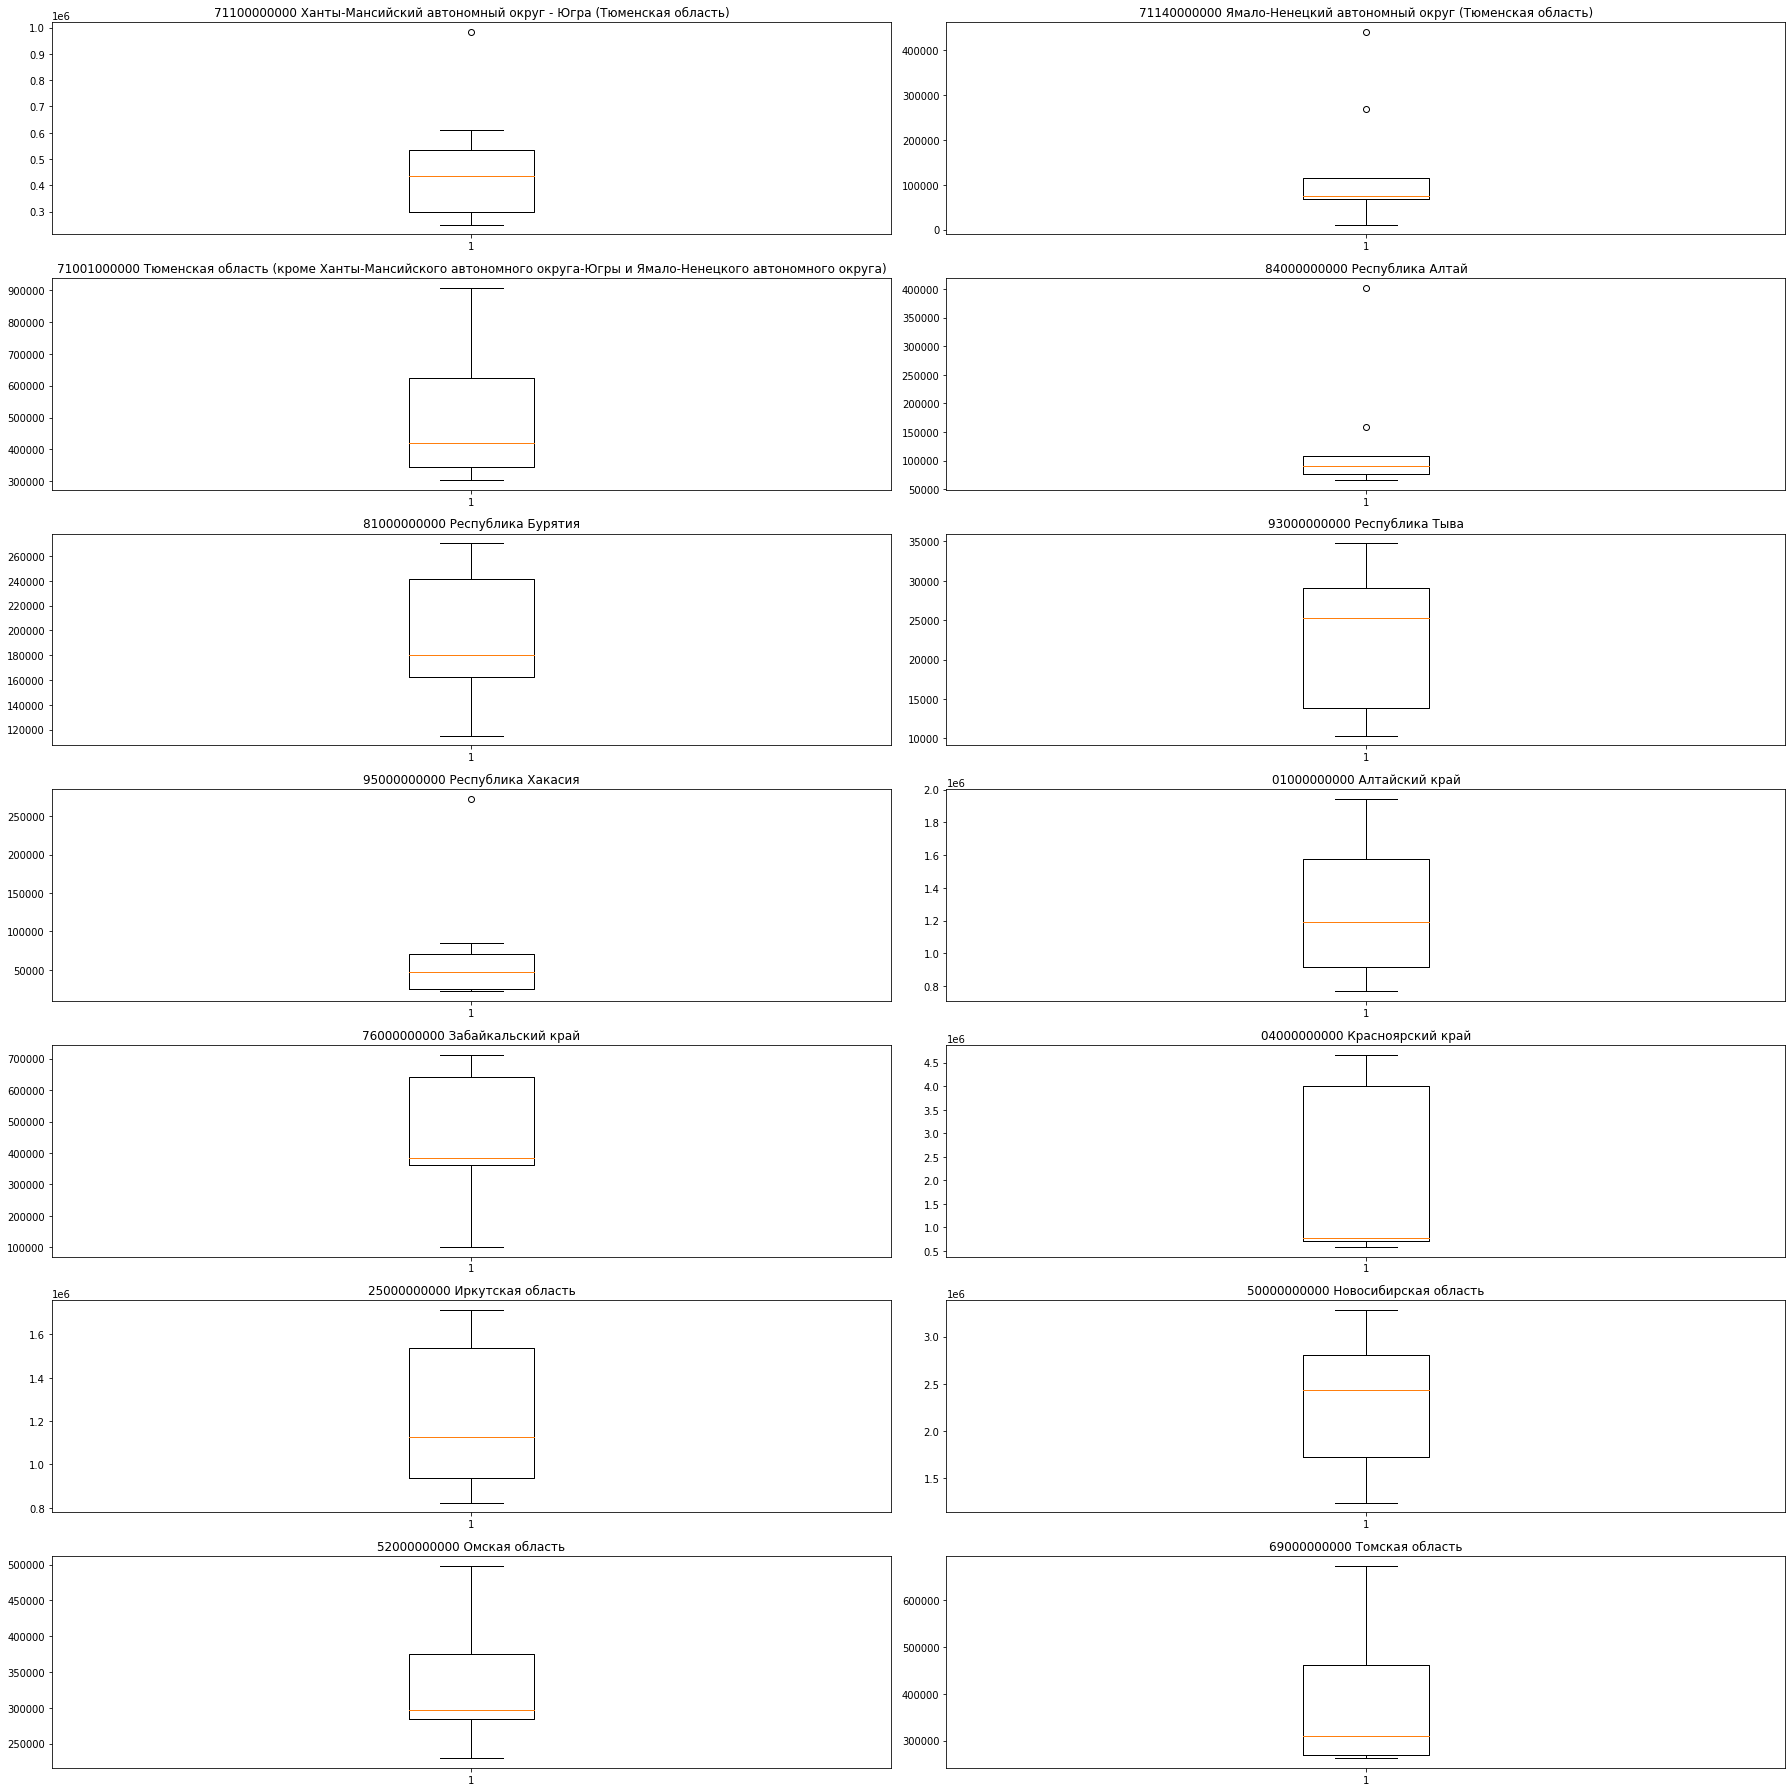

In [23]:
fig = plt.figure(tight_layout=True)
fig.set_figheight(25)
fig.set_figwidth(25)
gs = gridspec.GridSpec(7, 2)
n = 0
for i in range(7):
    for j in range(2):
        ax = fig.add_subplot(gs[i, j])
        ax.boxplot(data[names[n]].dropna())
        ax.set_title(names[n])
        n += 1


## С MinMax нормированием

In [24]:
a = -1
b = 1
data_normed_by_min_max = data.apply(lambda s: a + (s - s.min())/(s.max() - s.min()) * (b-a))


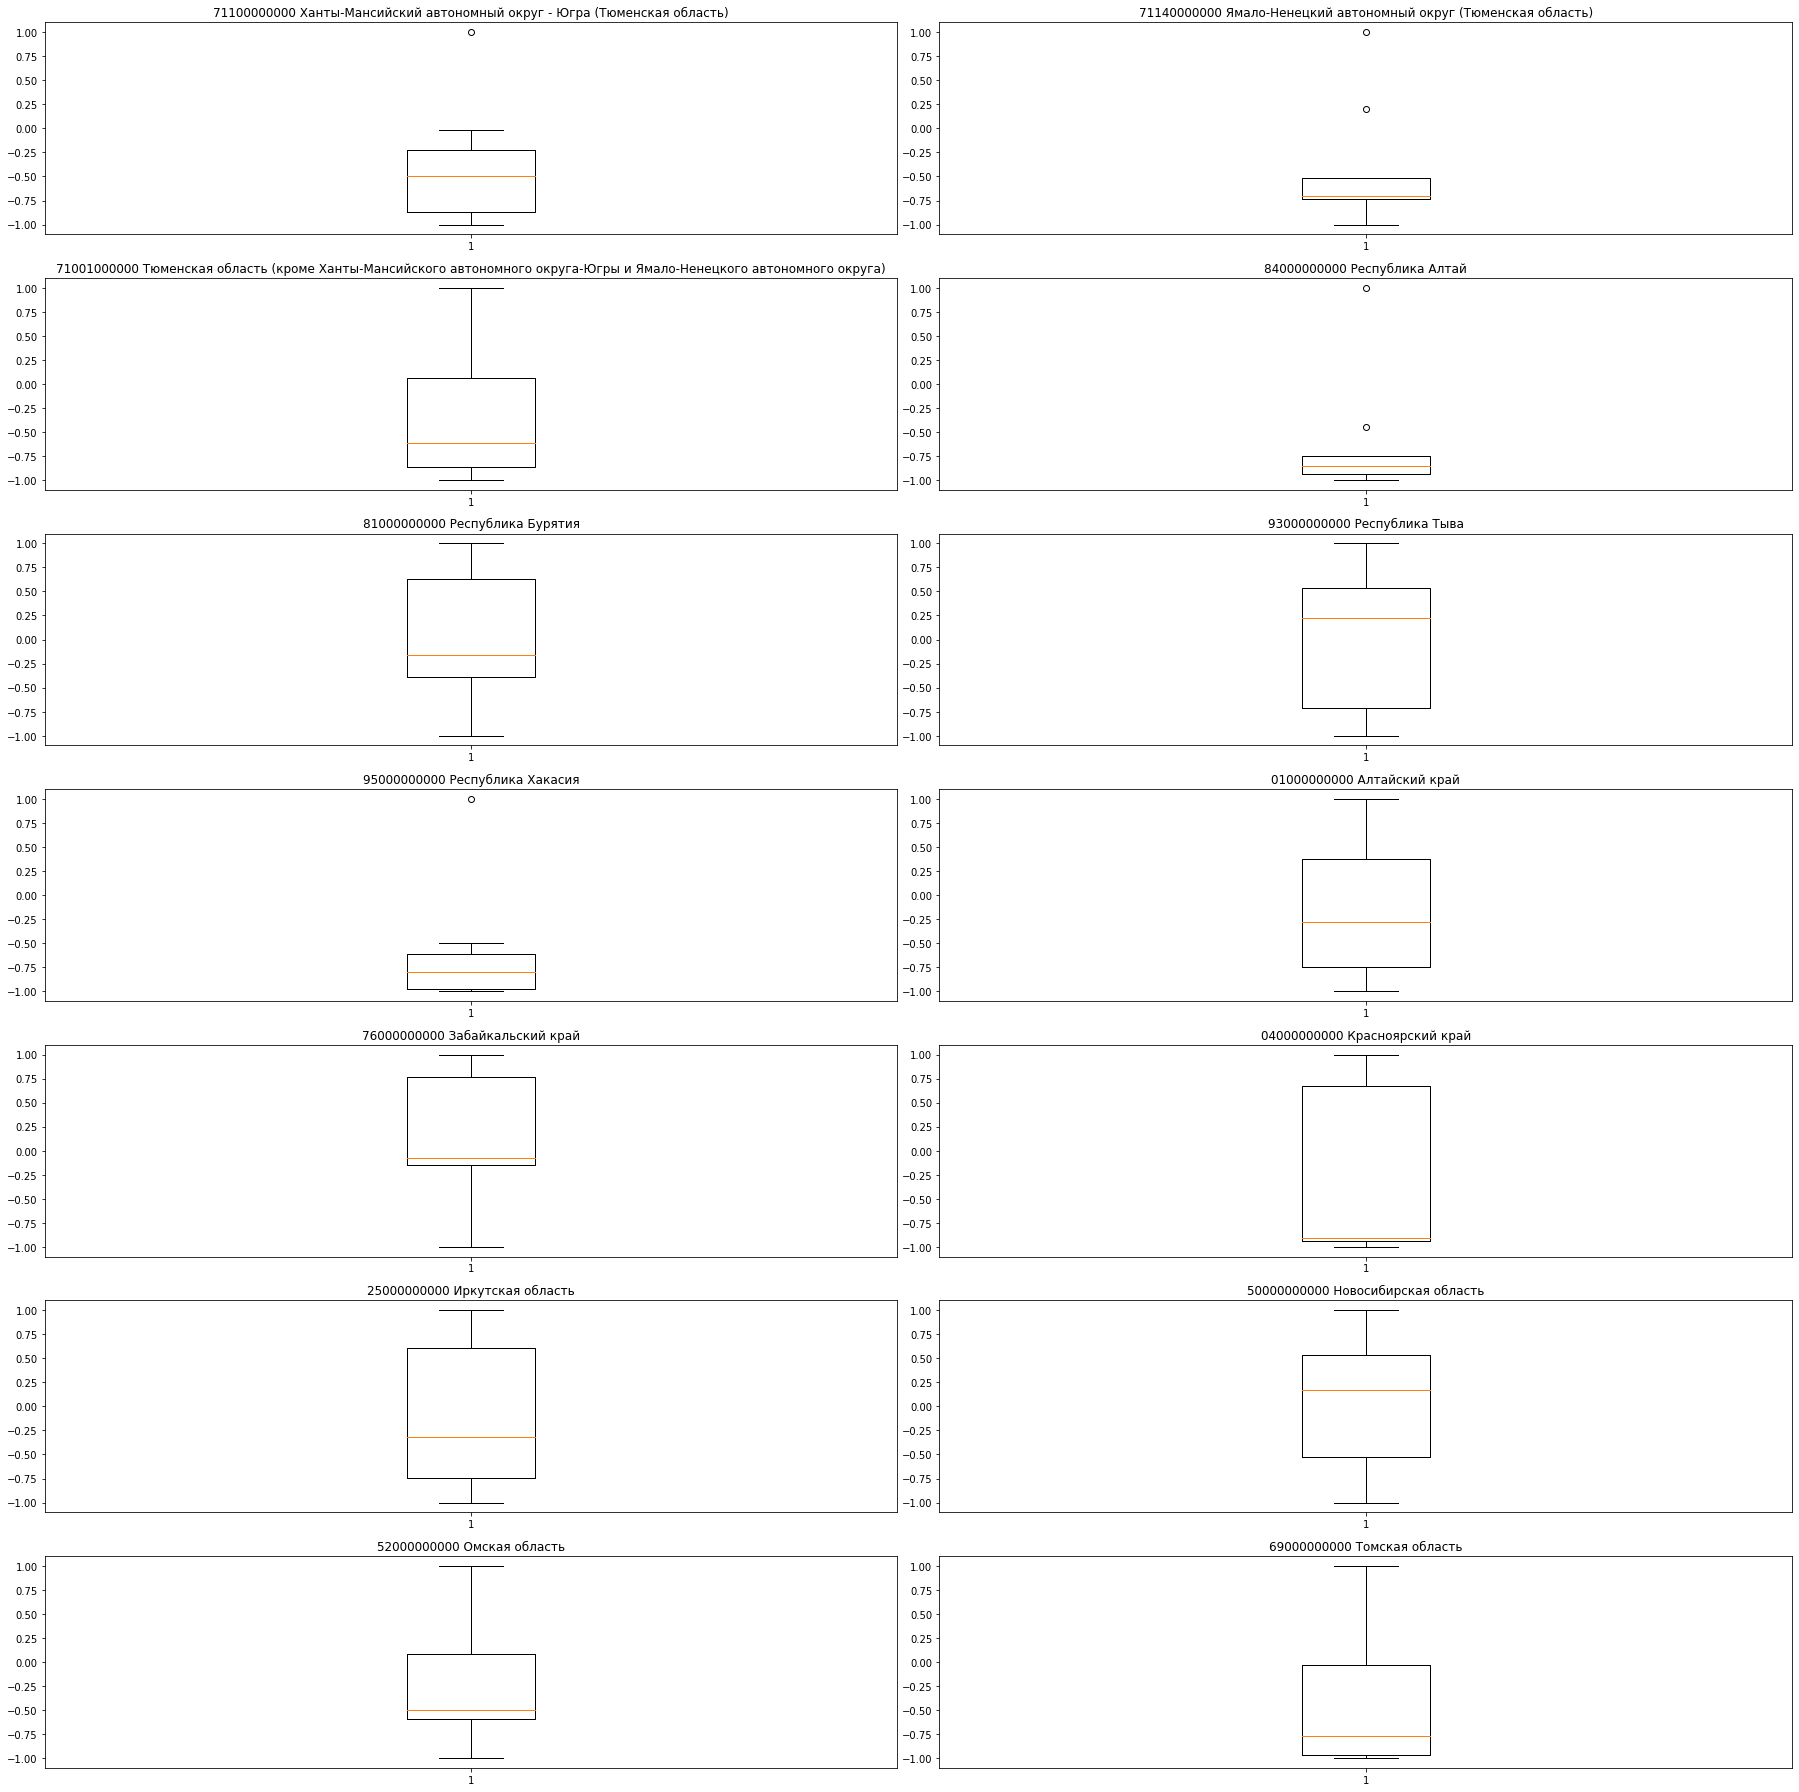

In [25]:
fig = plt.figure(tight_layout=True)
fig.set_figheight(25)
fig.set_figwidth(25)
gs = gridspec.GridSpec(7, 2)
n = 0
for i in range(7):
    for j in range(2):
        ax = fig.add_subplot(gs[i, j])
        ax.boxplot(data_normed_by_min_max[names[n]].dropna())
        ax.set_title(names[n])
        n += 1


## Со средне-дисперсной нормированием

In [26]:
a = -1
b = 1
data_normed_by_mean_dispersion = data.apply(lambda s: (s-s.mean())/s.std())


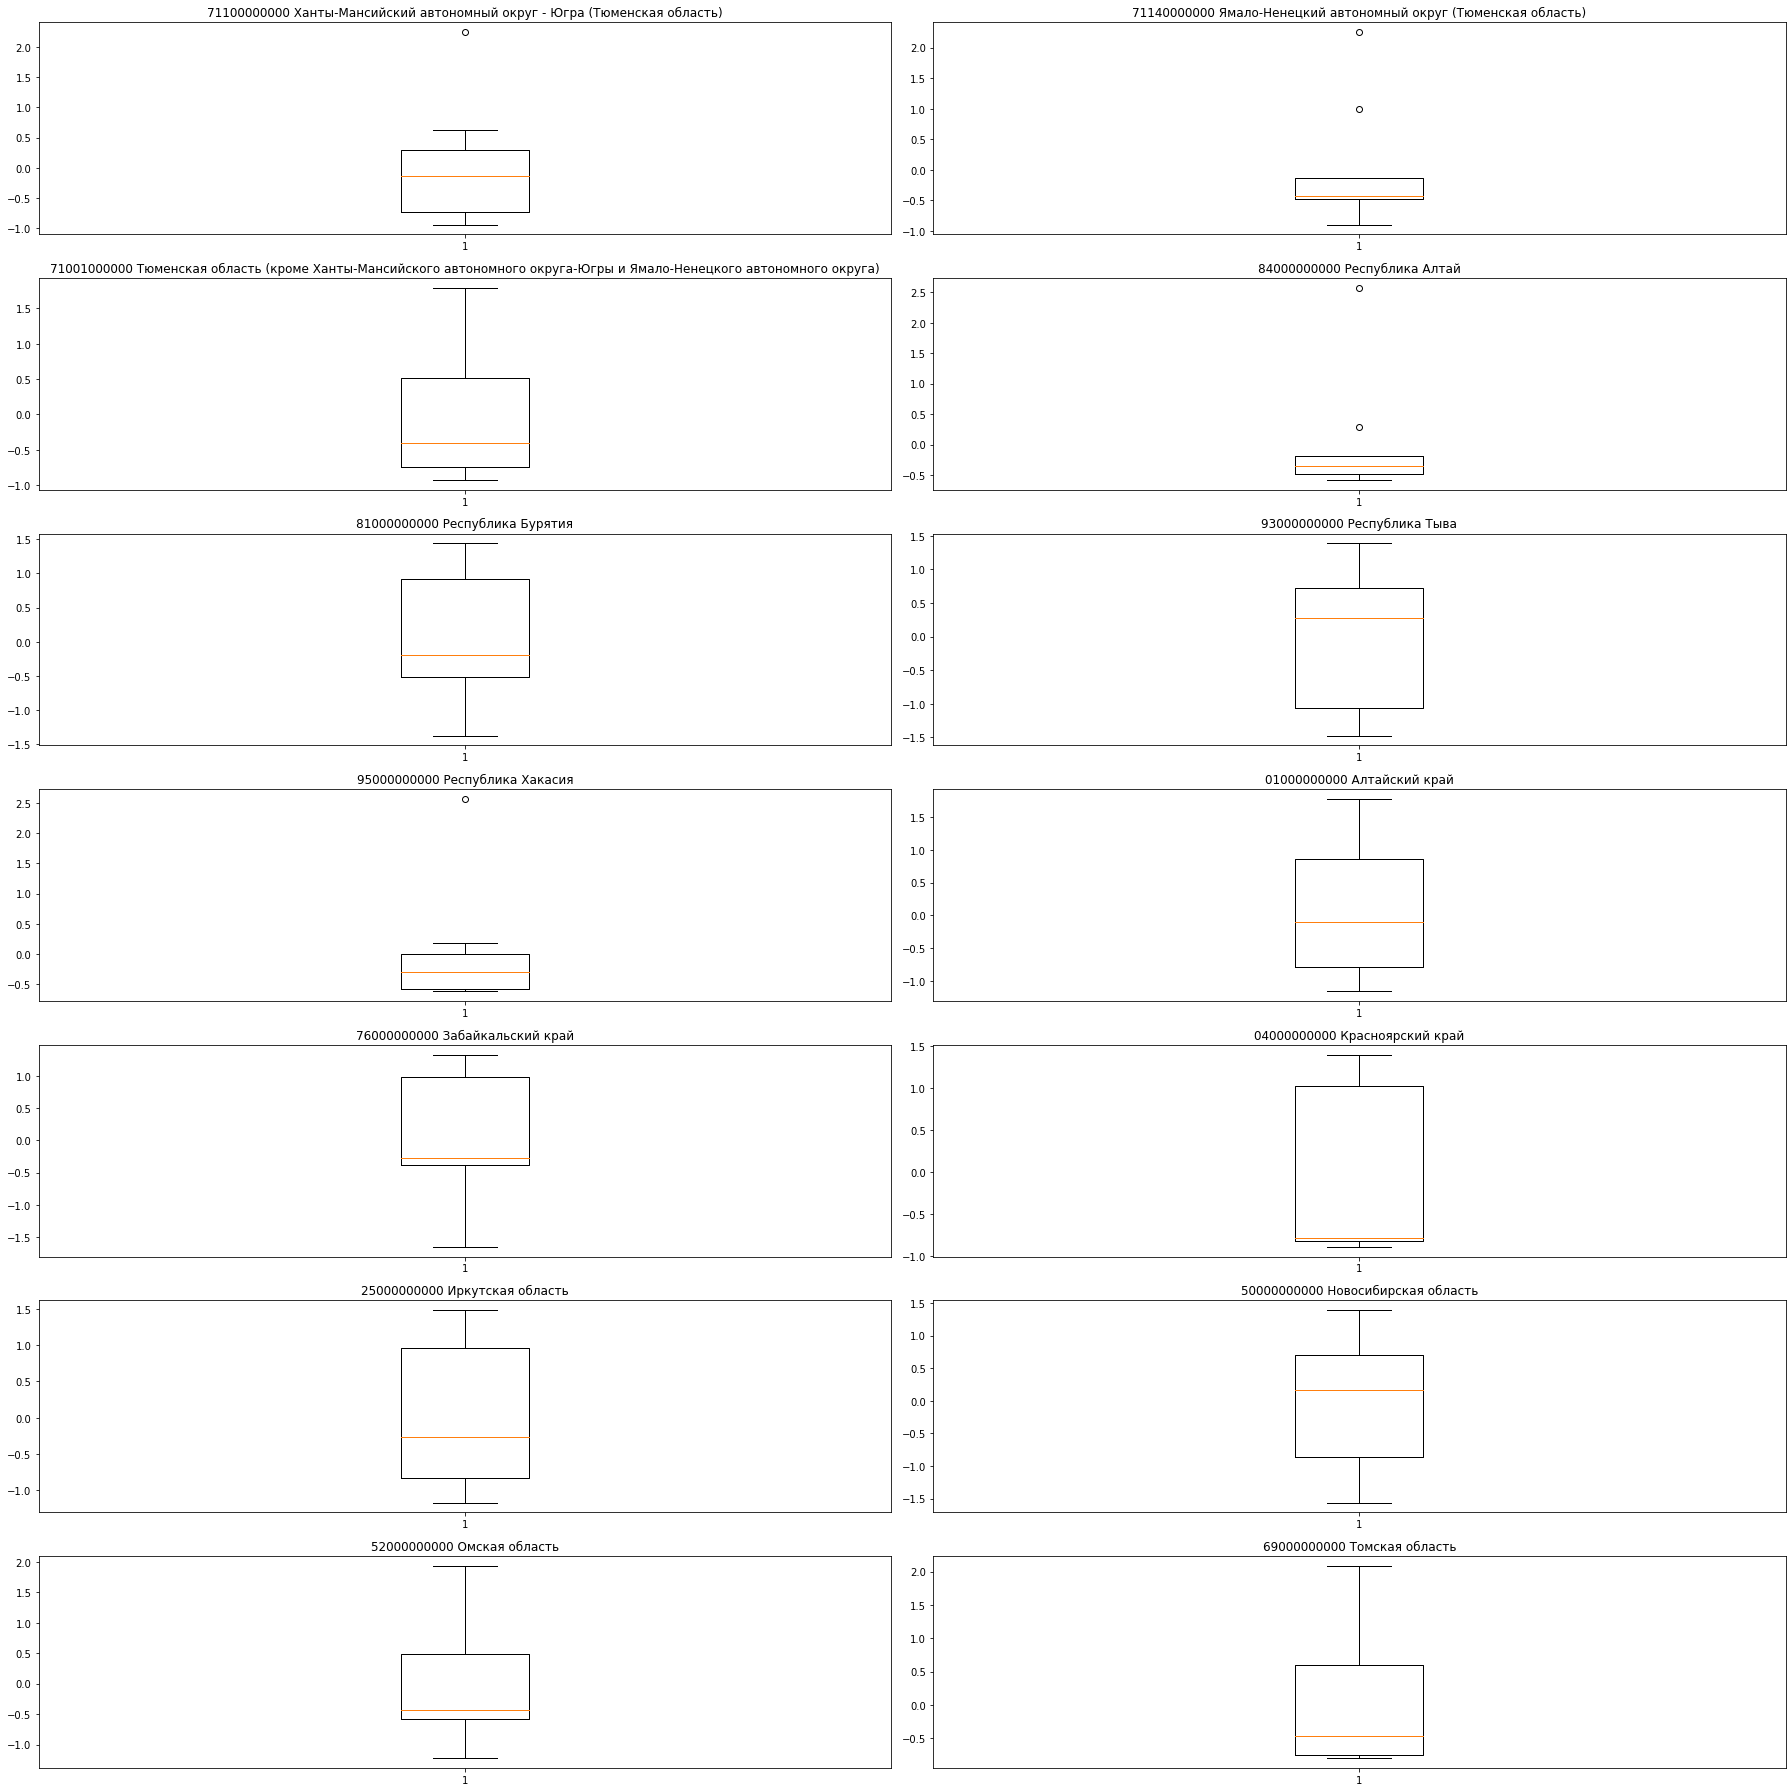

In [27]:
fig = plt.figure(tight_layout=True)
fig.set_figheight(25)
fig.set_figwidth(25)
gs = gridspec.GridSpec(7, 2)
n = 0
for i in range(7):
    for j in range(2):
        ax = fig.add_subplot(gs[i, j])
        ax.boxplot(data_normed_by_mean_dispersion[names[n]].dropna())
        ax.set_title(names[n])
        n += 1
